# Toy example for testing the reconstruction algorithm

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from metric_graph_reconstruction import *

In [3]:
np.random.seed(2)

# draw number 7
diagonal = [Point(i, i) for i in range(1, 28, 1)]
top = [Point(i, 28 - 1) for i in range(1, 28, 1)]
middle = [Point(i, 14) for i in range(7, 20, 1)]
points = diagonal + top + middle

# add noise
points_noise = []
sigma = 0.1
for point in points:
    x = point.x + np.random.normal(0, sigma, 1)[0]
    y = point.y + np.random.normal(0, sigma, 1)[0]
    points_noise.append(Point(x, y))

# inputs to the algorithm
point_cloud = PointCloud(points_noise)

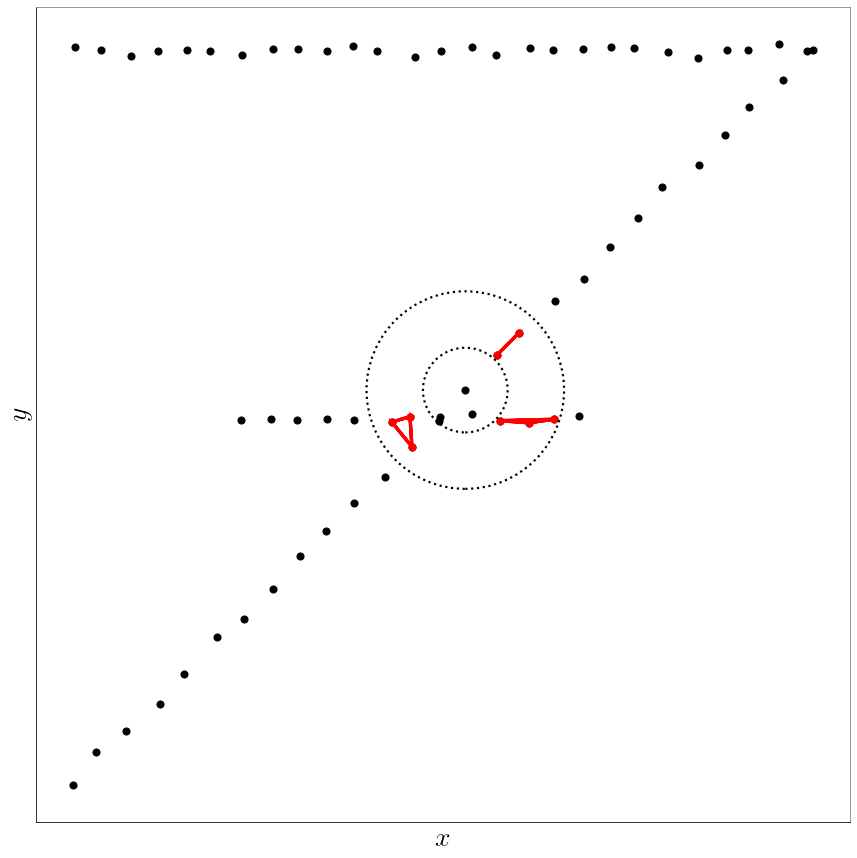

In [4]:
delta, r, p11 = 2, 1.5, 0.9
draw_labeling(point_cloud, delta, r, p11)

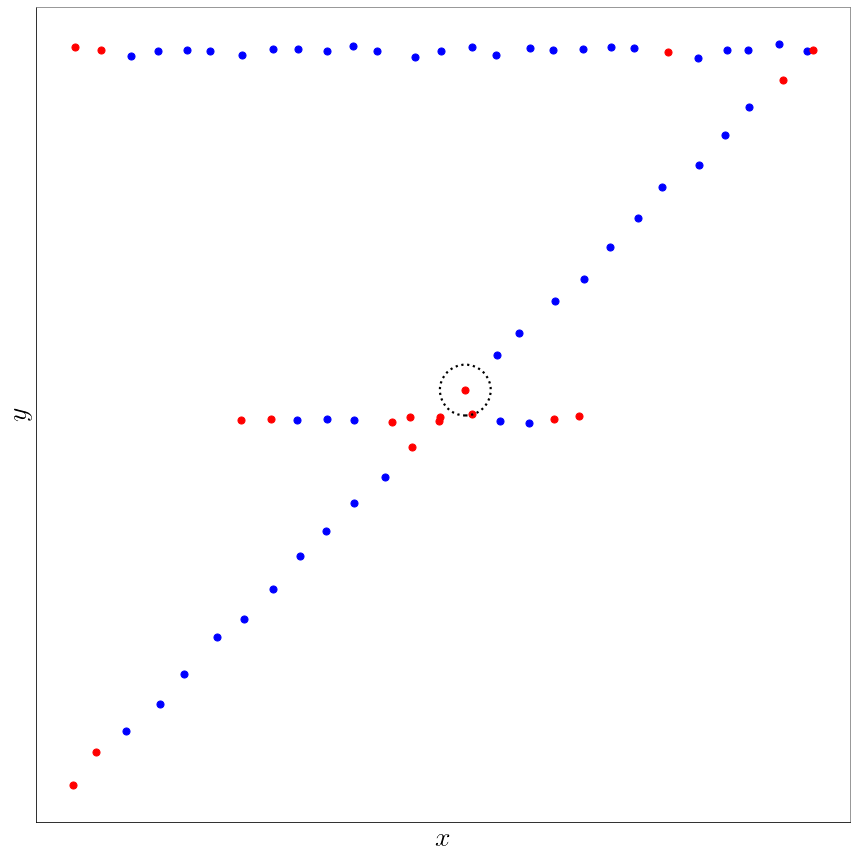

In [5]:
draw_re_labeling(point_cloud, delta, r, p11)

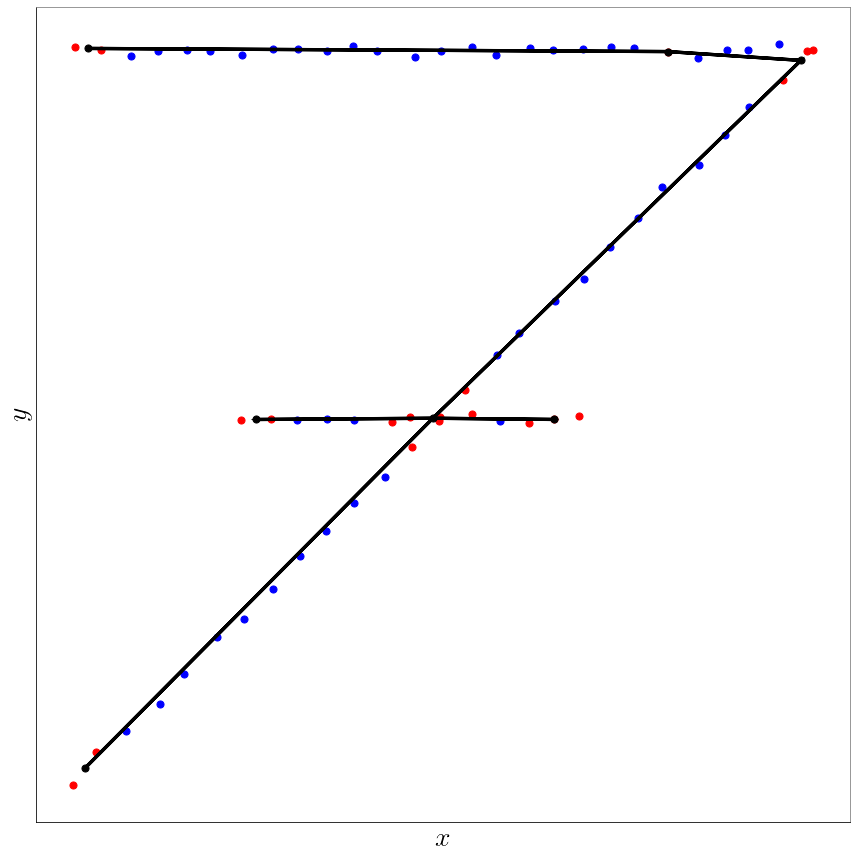

In [6]:
reconstructed = reconstruct(point_cloud, delta, r, p11)
space = Space(2)
space.draw_points(point_cloud.points)
space.draw_graph(reconstructed)

## Three-dimensional space

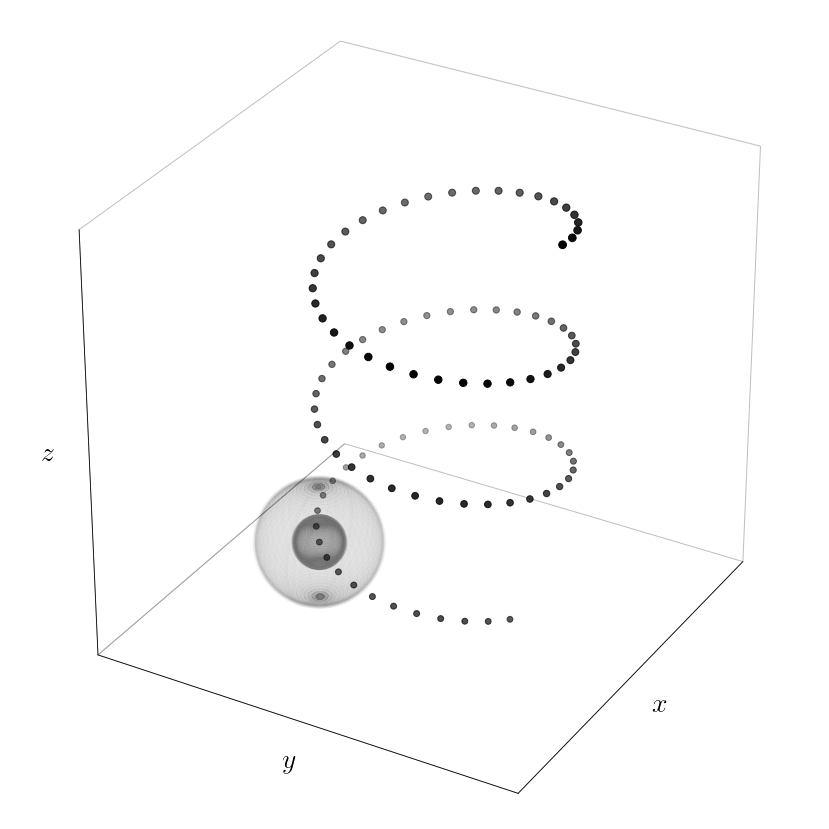

In [7]:
t = np.linspace(np.pi/6, 6*np.pi, 100)
xs = np.sin(t)
ys = np.cos(t)
zs = t/6

points = list(zip(xs, ys, zs))
points = [Point(point[0], point[1], point[2]) for point in points]
point_cloud = PointCloud(points)

space = Space(3)
space.draw_points(point_cloud.points)
space.draw_shell(point_cloud.points[10], 0.5)
space.draw_shell(point_cloud.points[10], 0.2)
space.show()

In [8]:
import os

space.fig.savefig('../figures/3d.png', dpi=300)
os.system('convert ../figures/3d.png -trim ../figures/3d.png')

0